In [101]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data_csv.csv")

In [105]:
df.head()


,CASE_NO_PATIENT'S,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits,A10-score
0,1,3.0,2,3.0,Yes,Yes,Yes,Yes,Yes,Yes,1,F,middle eastern,Yes,No,Family Member,No,3
1,2,6.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,2,M,White European,Yes,No,Family Member,Yes,4
2,3,7.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,4,M,Middle Eastern,Yes,No,Family Member,Yes,4
3,4,1.0,2,10.0,Yes,Yes,No,Yes,Yes,Yes,2,M,Hispanic,No,No,Family Member,Yes,10
4,5,3.0,2,9.0,Yes,Yes,No,Yes,Yes,Yes,1,F,White European,No,No,Family Member,Yes,9


In [103]:
df['A10-score'] = df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10_Autism_Spectrum_Quotient']].sum(axis=1)


In [104]:
df = df.drop(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10_Autism_Spectrum_Quotient', 'Anxiety_disorder'], axis = 1)

In [120]:
df["Ethnicity"].value_counts()

Asian             605
White European    549
Middle Eastern    403
South Asian       255
Others             54
Black              53
Hispanic           40
Latino             26
Name: Ethnicity, dtype: int64

In [119]:
df['Ethnicity'] = df['Ethnicity'].replace('PaciFica', 'Others')

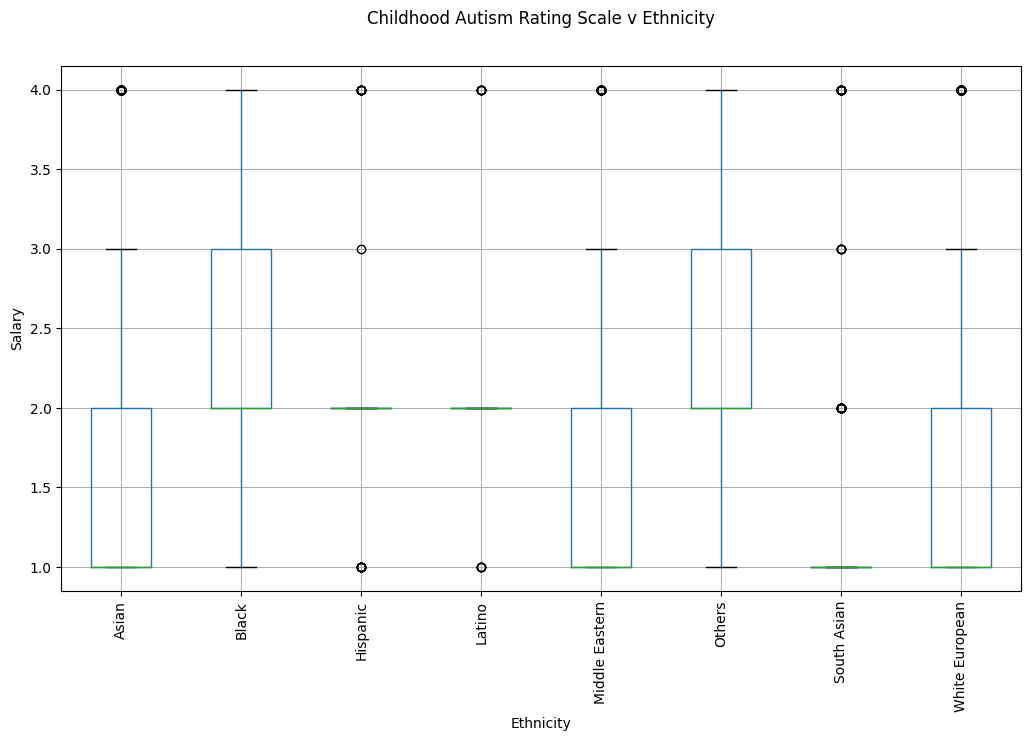

In [121]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Childhood Autism Rating Scale', 'Ethnicity', ax=ax)
plt.suptitle('Childhood Autism Rating Scale v Ethnicity')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [124]:
df.head()

,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits,A10-score
0,3.0,2,3.0,Yes,Yes,Yes,Yes,Yes,Yes,1,F,Middle Eastern,Yes,No,Family Member,No,3
1,6.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,2,M,White European,Yes,No,Family Member,Yes,4
2,7.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,4,M,Middle Eastern,Yes,No,Family Member,Yes,4
3,1.0,2,10.0,Yes,Yes,No,Yes,Yes,Yes,2,M,Hispanic,No,No,Family Member,Yes,10
4,3.0,2,9.0,Yes,Yes,No,Yes,Yes,Yes,1,F,White European,No,No,Family Member,Yes,9


In [123]:
df = df.drop("CASE_NO_PATIENT'S", axis=1)

In [125]:
from sklearn.preprocessing import LabelEncoder
le_speechDisorder = LabelEncoder()
df['Speech Delay/Language Disorder'] = le_speechDisorder.fit_transform(df['Speech Delay/Language Disorder'])
df["Speech Delay/Language Disorder"].unique()

array([1, 0])

In [126]:
le_learnDisorder = LabelEncoder()
df['Learning disorder'] = le_learnDisorder.fit_transform(df['Learning disorder'])
df["Learning disorder"].unique()

array([1, 0])

In [127]:
le_genDisorder = LabelEncoder()
df['Genetic_Disorders'] = le_genDisorder.fit_transform(df['Genetic_Disorders'])
df["Genetic_Disorders"].unique()

array([1, 0])

In [130]:
le_depression = LabelEncoder()
df['Depression'] = le_depression.fit_transform(df['Depression'])
df["Depression"].unique()

array([1, 0])

In [129]:
df.loc[df["Depression"] == 2, "Depression"] = 0

In [131]:
df["Social/Behavioural Issues"].value_counts()

Yes    1040
No      931
Name: Social/Behavioural Issues, dtype: int64

In [132]:
le_intellectDisable = LabelEncoder()
df['Global developmental delay/intellectual disability'] = le_intellectDisable.fit_transform(df['Global developmental delay/intellectual disability'])
df["Global developmental delay/intellectual disability"].unique()

array([1, 0])

In [135]:
le_socialIssues = LabelEncoder()
df['Social/Behavioural Issues'] = le_socialIssues.fit_transform(df['Social/Behavioural Issues'])
df["Social/Behavioural Issues"].unique()

array([1, 0])

In [134]:
df.loc[df["Social/Behavioural Issues"] == 2, "Social/Behavioural Issues"] = 0

In [136]:
df = df.dropna()
df.isnull().sum()

Social_Responsiveness_Scale                           0
Age_Years                                             0
Qchat_10_Score                                        0
Speech Delay/Language Disorder                        0
Learning disorder                                     0
Genetic_Disorders                                     0
Depression                                            0
Global developmental delay/intellectual disability    0
Social/Behavioural Issues                             0
Childhood Autism Rating Scale                         0
Sex                                                   0
Ethnicity                                             0
Jaundice                                              0
Family_mem_with_ASD                                   0
Who_completed_the_test                                0
ASD_traits                                            0
A10-score                                             0
dtype: int64

In [137]:
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df["Sex"].unique()

array([0, 1])

In [138]:
le_ethnicity = LabelEncoder()
df['Ethnicity'] = le_ethnicity.fit_transform(df['Ethnicity'])
df["Ethnicity"].unique()

array([4, 7, 2, 1, 0, 6, 5, 3])

In [139]:
le_family = LabelEncoder()
df['Family_mem_with_ASD'] = le_family.fit_transform(df['Family_mem_with_ASD'])
df["Family_mem_with_ASD"].unique()

array([0, 1])

In [140]:
df = df.drop(['Who_completed_the_test', 'Jaundice'], axis = 1)

In [141]:
df.head()

,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Sex,Ethnicity,Family_mem_with_ASD,ASD_traits,A10-score
0,3.0,2,3.0,1,1,1,1,1,1,1,0,4,0,No,3
1,6.0,3,4.0,1,1,1,1,1,1,2,1,7,0,Yes,4
2,7.0,3,4.0,1,1,1,1,1,1,4,1,4,0,Yes,4
3,1.0,2,10.0,1,1,0,1,1,1,2,1,2,0,Yes,10
4,3.0,2,9.0,1,1,0,1,1,1,1,0,7,0,Yes,9


In [142]:
le_asd = LabelEncoder()
df['ASD_traits'] = le_asd.fit_transform(df['ASD_traits'])
df["ASD_traits"].unique()

array([0, 1])

In [143]:
df.head()

,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Sex,Ethnicity,Family_mem_with_ASD,ASD_traits,A10-score
0,3.0,2,3.0,1,1,1,1,1,1,1,0,4,0,0,3
1,6.0,3,4.0,1,1,1,1,1,1,2,1,7,0,1,4
2,7.0,3,4.0,1,1,1,1,1,1,4,1,4,0,1,4
3,1.0,2,10.0,1,1,0,1,1,1,2,1,2,0,1,10
4,3.0,2,9.0,1,1,0,1,1,1,1,0,7,0,1,9


In [151]:
y = df['ASD_traits']
X = df.drop('ASD_traits', axis=1)

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

In [147]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(error)

0.0


In [155]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)


In [156]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(error)

0.1435916317235476


In [157]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)


In [158]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(error)

0.0


In [159]:
import pickle


In [162]:
data = {"model": random_forest_model, "le_ethnicity": le_ethnicity, "le_speechDisorder": le_speechDisorder, "le_learnDisorder": le_learnDisorder, "le_genDisorder": le_genDisorder, "le_depression": le_depression, "le_intellectDisable": le_intellectDisable, "le_socialIssues": le_socialIssues, "le_sex": le_sex, "le_family": le_family}
with open('rfc.pkl', 'wb') as file:
    pickle.dump(data, file)

In [163]:
with open('rfc.pkl', 'rb') as file:
    data = pickle.load(file)

decision_tree_model_loaded = data["model"]
le_speechDisorder = data["le_speechDisorder"]
le_learnDisorder = data["le_learnDisorder"]
le_genDisorder = data["le_genDisorder"]
le_depression = data["le_depression"]
le_intellectDisable = data["le_intellectDisable"]
le_socialIssues = data["le_socialIssues"]
le_sex = data["le_sex"]
le_family = data["le_family"]